In [2]:
import numpy as np
import pandas as pd

In [3]:
city_series = pd.Series(["Tokyo", "Los Angeles", "London"], name="City")
print(f"Pandas Series:\n{city_series}\n")

Pandas Series:
0          Tokyo
1    Los Angeles
2         London
Name: City, dtype: object



In [4]:
data = {
    "City": ["Tokyo", "Los Angeles", "London"],
    "Latitude": [35.6895, 34.0522, 51.5074],
    "Longitude": [139.6917, -118.2437, -0.1278],
}
df = pd.DataFrame(data)
print(f"Pandas DataFrame:\n{df}")

Pandas DataFrame:
          City  Latitude  Longitude
0        Tokyo   35.6895   139.6917
1  Los Angeles   34.0522  -118.2437
2       London   51.5074    -0.1278


In [5]:
df

,City,Latitude,Longitude
0,Tokyo,35.6895,139.6917
1,Los Angeles,34.0522,-118.2437
2,London,51.5074,-0.1278


In [6]:
latitudes = df["Latitude"]
print(f"Latitudes:\n{latitudes}\n")
longitudes = df["Longitude"]
print(f"Longitudes:\n{longitudes}\n")

Latitudes:
0    35.6895
1    34.0522
2    51.5074
Name: Latitude, dtype: float64

Longitudes:
0    139.6917
1   -118.2437
2     -0.1278
Name: Longitude, dtype: float64



In [7]:
df_filtered = df[df["Longitude"] < 0]
df_filtered

,City,Latitude,Longitude
1,Los Angeles,34.0522,-118.2437
2,London,51.5074,-0.1278


In [8]:
df["lat_radians"] = np.radians(df["Latitude"])
df["lon_radians"] = np.radians(df["Longitude"])
df

,City,Latitude,Longitude,lat_radians,lon_radians
0,Tokyo,35.6895,139.6917,0.622899,2.438080
1,Los Angeles,34.0522,-118.2437,0.594323,-2.063742
2,London,51.5074,-0.1278,0.898974,-0.002231


In [9]:
df["lat_radians"] = np.radians(df["Latitude"]) + 5

In [10]:
# Column doesn't exist, so this will add a new column
# Columns exist, so this will overwrite the existing column
df

,City,Latitude,Longitude,lat_radians,lon_radians
0,Tokyo,35.6895,139.6917,5.622899,2.438080
1,Los Angeles,34.0522,-118.2437,5.594323,-2.063742
2,London,51.5074,-0.1278,5.898974,-0.002231


In [11]:
# Creating a DataFrame
data = {
    "City": ["Tokyo", "Los Angeles", "London", "Paris", "Chicago"],
    "Country": ["Japan", "USA", "UK", "France", "USA"],
    "Population": [37400068, 3970000, 9126366, 2140526, 2665000],
}
df = pd.DataFrame(data)
df

,City,Country,Population
0,Tokyo,Japan,37400068
1,Los Angeles,USA,3970000
2,London,UK,9126366
3,Paris,France,2140526
4,Chicago,USA,2665000


In [12]:
# grouping and summary in R (aggregation and grouping)
df_grouped = df.groupby("Country")["Population"].sum().reset_index()
df_grouped

,Country,Population
0,France,2140526
1,Japan,37400068
2,UK,9126366
3,USA,6635000


In [13]:
df1 = pd.DataFrame(
    {"City": ["Tokyo", "Los Angeles", "London"], "Country": ["Japan", "USA", "UK"]}
)
df2 = pd.DataFrame(
    {
        "City": ["Tokyo", "Los Angeles", "London"],
        "Population": [37400068, 3970000, 9126366],
    }
)

In [14]:
df1

,City,Country
0,Tokyo,Japan
1,Los Angeles,USA
2,London,UK


In [15]:
df2

,City,Population
0,Tokyo,37400068
1,Los Angeles,3970000
2,London,9126366


In [16]:
df_merged = pd.merge(df1, df2, on="City")
df_merged

,City,Country,Population
0,Tokyo,Japan,37400068
1,Los Angeles,USA,3970000
2,London,UK,9126366


In [17]:
df.columns

Index(['City', 'Country', 'Population'], dtype='object')

In [18]:
# Load the dataset from an online source
url = "https://raw.githubusercontent.com/pandas-dev/pandas/main/doc/data/air_quality_no2.csv"
air_quality = pd.read_csv(url, index_col=0, parse_dates=True)

# Display the first few rows of the dataset
air_quality.head()

,station_antwerp,station_paris,station_london
datetime,,,
2019-05-07 02:00:00,NaN,NaN,23.0
2019-05-07 03:00:00,50.5,25.0,19.0
2019-05-07 04:00:00,45.0,27.7,19.0
2019-05-07 05:00:00,NaN,50.4,16.0
2019-05-07 06:00:00,NaN,61.9,NaN


<Axes: xlabel='datetime'>

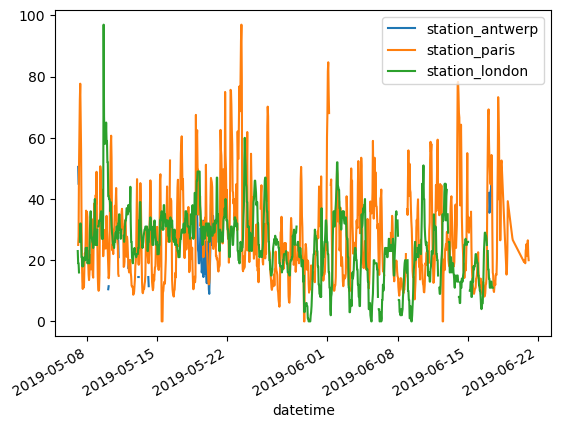

In [19]:
air_quality.plot()

<Axes: xlabel='datetime'>

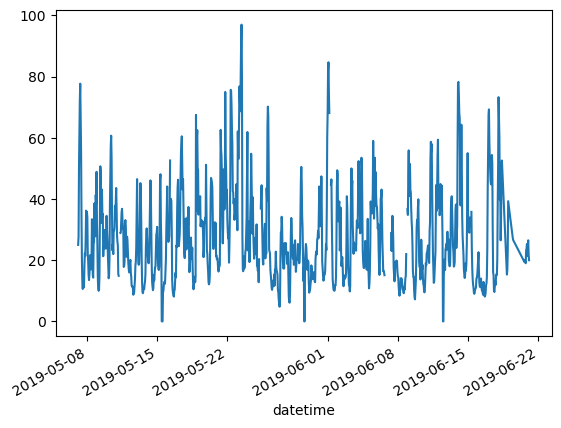

In [20]:
air_quality["station_paris"].plot()

<Axes: xlabel='station_paris', ylabel='station_london'>

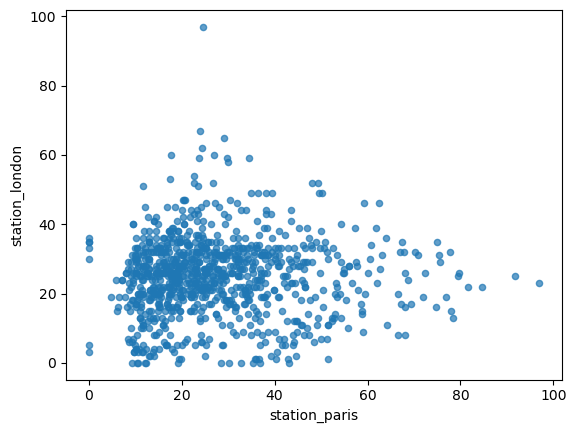

In [22]:
air_quality.plot.scatter(x="station_paris", y="station_london", alpha=0.7)

array([<Axes: xlabel='datetime'>, <Axes: xlabel='datetime'>,
       <Axes: xlabel='datetime'>], dtype=object)

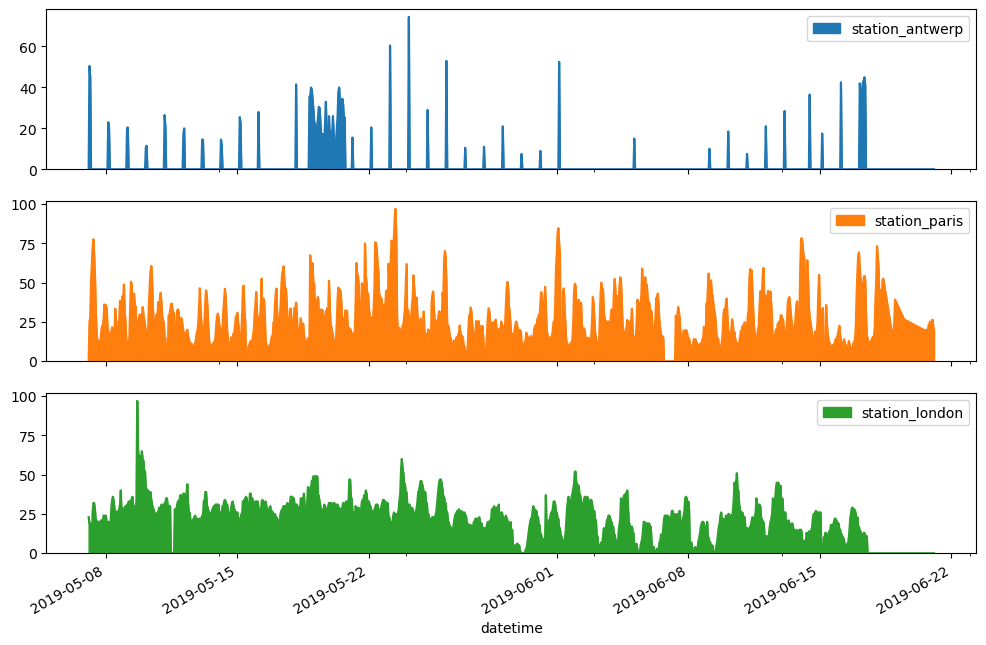

In [24]:
air_quality.plot.area(figsize=(12, 8), subplots=True)

In [25]:
def haversine_np(lat1, lon1, lat2, lon2):
    R = 6371.0  # Earth radius in kilometers
    dlat = np.radians(lat2 - lat1)
    dlon = np.radians(lon2 - lon1)
    a = (
        np.sin(dlat / 2) ** 2
        + np.cos(np.radians(lat1)) * np.cos(np.radians(lat2)) * np.sin(dlon / 2) ** 2
    )
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    distance = R * c
    return distance


# Create a new DataFrame with city pairs
city_pairs = pd.DataFrame(
    {
        "City1": ["Tokyo", "Tokyo", "Los Angeles"],
        "City2": ["Los Angeles", "London", "London"],
        "Lat1": [35.6895, 35.6895, 34.0522],
        "Lon1": [139.6917, 139.6917, -118.2437],
        "Lat2": [34.0522, 51.5074, 51.5074],
        "Lon2": [-118.2437, -0.1278, -0.1278],
    }
)
city_pairs

,City1,City2,Lat1,Lon1,Lat2,Lon2
0,Tokyo,Los Angeles,35.6895,139.6917,34.0522,-118.2437
1,Tokyo,London,35.6895,139.6917,51.5074,-0.1278
2,Los Angeles,London,34.0522,-118.2437,51.5074,-0.1278


In [26]:
city_pairs["Distance_km"] = haversine_np(
    city_pairs["Lat1"], city_pairs["Lon1"], city_pairs["Lat2"], city_pairs["Lon2"]
)
city_pairs

,City1,City2,Lat1,Lon1,Lat2,Lon2,Distance_km
0,Tokyo,Los Angeles,35.6895,139.6917,34.0522,-118.2437,8815.473356
1,Tokyo,London,35.6895,139.6917,51.5074,-0.1278,9558.713695
2,Los Angeles,London,34.0522,-118.2437,51.5074,-0.1278,8755.602341


In [27]:
def calculate_average_distance(df):
    lat1 = df["Latitude"].values
    lon1 = df["Longitude"].values
    lat2, lon2 = np.meshgrid(lat1, lon1)
    distances = haversine_np(lat1, lon1, lat2, lon2)
    avg_distances = np.mean(distances, axis=1)
    return avg_distances


# Creating a DataFrame
data = {
    "City": ["Tokyo", "Los Angeles", "London"],
    "Latitude": [35.6895, 34.0522, 51.5074],
    "Longitude": [139.6917, -118.2437, -0.1278],
}
df = pd.DataFrame(data)

# Apply the function to calculate average distances
df["Avg_Distance_km"] = calculate_average_distance(df)
df

,City,Latitude,Longitude,Avg_Distance_km
0,Tokyo,35.6895,139.6917,5624.601390
1,Los Angeles,34.0522,-118.2437,5294.682354
2,London,51.5074,-0.1278,7041.924003
